**#Google Analytics Customer Revenue Prediction**

Team Members:                               ID                Contribution <BR>
Prashant agarwal                            19089198          100%         <BR>
Mohammad Tauseef Khan                       19140886          100%         <BR>
Sri Prudhvi Raju Rohit Kumar Dandu          19116543          100%         <BR>
Tarum Kumar Sunkara                         19116535          100%         <BR>
For EDA and preprocessing,we have divided features among team and each    <BR>
team member work in collaboration to analyse and preprocess tha data.  <BR>
Apart from EDA and Preprocessing each team members have trained one <BR> regression model on their own and got individual score on kaggle.We have attached screenshots of score for the same. <BR> 


We are given Google merchandise store data of user transactions from August 1st 2016 to April 30th 2018 as train data <br>
and from May 1st 2018 to October 15th 2018 as test data. Each row in the dataset is one visit to the store and contains data about <br>
user session , geo network, device, traffic source and transaction revenue for each session.<br>
We are predicting the natural log of the sum of all transactions per user.<br>
Some of the columns in the data are in JSON format, first we need to expand the features into columns and it is observed that some columns are null.<br>
We need to remove those columns before starting EDA analysis.
Below is the brief summary of all columns.

• fullVisitorId- A unique identifier for each user of the Google Merchandise Store.<br> • channelGrouping - The channel via which the user came to the Store.<br> • date - The date on which the user visited the Store. <br>• device - The specifications for the device used to access the Store. <br>• geoNetwork - This section contains information about the geography of the user.<br> • socialEngagementType - Engagement type, either "Socially Engaged" or "Not Socially Engaged". <br>• totals - This section contains aggregate values across the session.<br> • trafficSource - This section contains information about the Traffic Source from which the session originated.<br> • visitId - An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to the user. For a completely unique ID, you should use a combination of fullVisitorId and visitId.<br> • visitNumber - The session number for this user. If this is the first session, then this is set to 1.<br> • visitStartTime - The timestamp (expressed as POSIX time).<br> • hits - This row and nested fields are populated for any and all types of hits. Provides a record of all page visits.<br> • customDimensions - This section contains any user-level or session-level custom dimensions that are set for a session. This is a repeated field and has an entry for each dimension that is set.<br> • totals - This set of columns mostly includes high-level aggregate data.

In [0]:
import random # random is to generate random values

import pandas as pd # to manipulate data frames 
import numpy as np # to work with matrix
from scipy.stats import kurtosis, skew # it's to explore some statistics of numerical values

import matplotlib.pyplot as plt # to graphics plot
import seaborn as sns # a good library to graphic plots
#import squarify # to better understand proportion of categorys - it's a treemap layout algorithm

# Importing librarys to use on interactive graphs
from plotly.offline import init_notebook_mode, iplot, plot 
import plotly.graph_objs as go 

import json # to convert json in df
from pandas.io.json import json_normalize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.linear_model import SGDRegressor

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#We have imported pre_processed data where we have converted json data into columns
data=pd.read_csv("/content/drive/My Drive/gstore_preprocessed_data.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



In [0]:
data.shape

(903653, 28)

In [0]:
print(data.columns)

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'device.browser', 'device.operatingSystem', 'device.deviceCategory',
       'geoNetwork.continent', 'geoNetwork.subContinent', 'geoNetwork.country',
       'totals.visits', 'totals.hits', 'totals.pageviews', 'totals.newVisits',
       'totals.transactionRevenue', 'trafficSource.source',
       'trafficSource.medium', 'year', 'month', 'day', 'mean_hits_per_day',
       'mean_pageviews_per_day', 'sum_hits_per_day', 'sum_pageviews_per_day'],
      dtype='object')


In [0]:
data.head(5)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.operatingSystem,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,totals.visits,totals.hits,totals.pageviews,totals.newVisits,totals.transactionRevenue,trafficSource.source,trafficSource.medium,year,month,day,mean_hits_per_day,mean_pageviews_per_day,sum_hits_per_day,sum_pageviews_per_day
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,Windows,desktop,Asia,Western Asia,Turkey,1,1,1.0,1.0,0.0,google,organic,2016,9,2,4.111480,3.501114,90432,77007.0
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,Macintosh,desktop,Oceania,Australasia,Australia,1,1,1.0,1.0,0.0,google,organic,2016,9,2,4.111480,3.501114,90432,77007.0
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,Windows,desktop,Europe,Southern Europe,Spain,1,1,1.0,1.0,0.0,google,organic,2016,9,2,4.111480,3.501114,90432,77007.0
3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,Linux,desktop,Asia,Southeast Asia,Indonesia,1,1,1.0,1.0,0.0,google,organic,2016,9,2,4.111480,3.501114,90432,77007.0
4,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,Android,mobile,Europe,Northern Europe,United Kingdom,1,1,1.0,NaN,0.0,google,organic,2016,9,2,4.381954,3.712220,93340,79074.0


In [0]:
data.tail(5)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.operatingSystem,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,totals.visits,totals.hits,totals.pageviews,totals.newVisits,totals.transactionRevenue,trafficSource.source,trafficSource.medium,year,month,day,mean_hits_per_day,mean_pageviews_per_day,sum_hits_per_day,sum_pageviews_per_day
903648,Social,2017-01-04,567297396362985009,567297396362985009_1483581760,Not Socially Engaged,1483581760,1,1483581760,Chrome,iOS,tablet,Oceania,Australasia,Australia,1,15,12.0,1.0,0.0,youtube.com,referral,2017,1,4,3.905364,3.351084,91159,78221.0
903649,Social,2017-01-04,2140149974339316233,2140149974339316233_1483557808,Not Socially Engaged,1483557808,1,1483557808,Chrome,Windows,desktop,Africa,Northern Africa,Egypt,1,16,11.0,1.0,0.0,youtube.com,referral,2017,1,4,3.905364,3.351084,91159,78221.0
903650,Social,2017-01-04,5123779100307500332,5123779100307500332_1483554750,Not Socially Engaged,1483554750,1,1483554750,Chrome,Windows,desktop,Americas,Caribbean,Puerto Rico,1,17,15.0,1.0,0.0,youtube.com,referral,2017,1,4,3.905364,3.351084,91159,78221.0
903651,Social,2017-01-04,7231728964973959842,7231728964973959842_1483543798,Not Socially Engaged,1483543798,1,1483543798,Chrome,Android,mobile,Asia,Southern Asia,Sri Lanka,1,18,13.0,1.0,0.0,youtube.com,referral,2017,1,4,3.905364,3.351084,91159,78221.0
903652,Social,2017-01-04,5744576632396406899,5744576632396406899_1483526434,Not Socially Engaged,1483526434,1,1483526434,Android Webview,Android,mobile,Asia,Eastern Asia,South Korea,1,24,21.0,1.0,0.0,youtube.com,referral,2017,1,4,3.905364,3.351084,91159,78221.0


In [0]:
#new visits have my blank columns
print(data.shape)
print(data.isna().sum())

(903653, 28)
channelGrouping                   0
date                              0
fullVisitorId                     0
sessionId                         0
socialEngagementType              0
visitId                           0
visitNumber                       0
visitStartTime                    0
device.browser                    0
device.operatingSystem            0
device.deviceCategory             0
geoNetwork.continent              0
geoNetwork.subContinent           0
geoNetwork.country                0
totals.visits                     0
totals.hits                       0
totals.pageviews                100
totals.newVisits             200593
totals.transactionRevenue         0
trafficSource.source              0
trafficSource.medium              0
year                              0
month                             0
day                               0
mean_hits_per_day                 0
mean_pageviews_per_day            0
sum_hits_per_day                  0
sum_pageviews_p

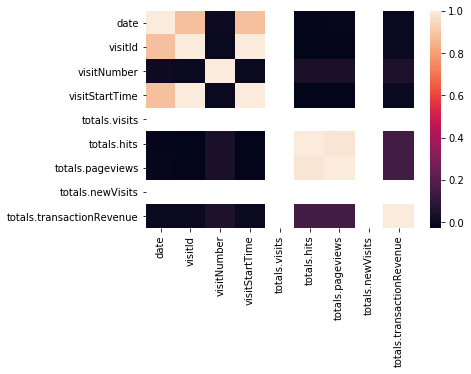

In [0]:
sns.heatmap(data.corr());

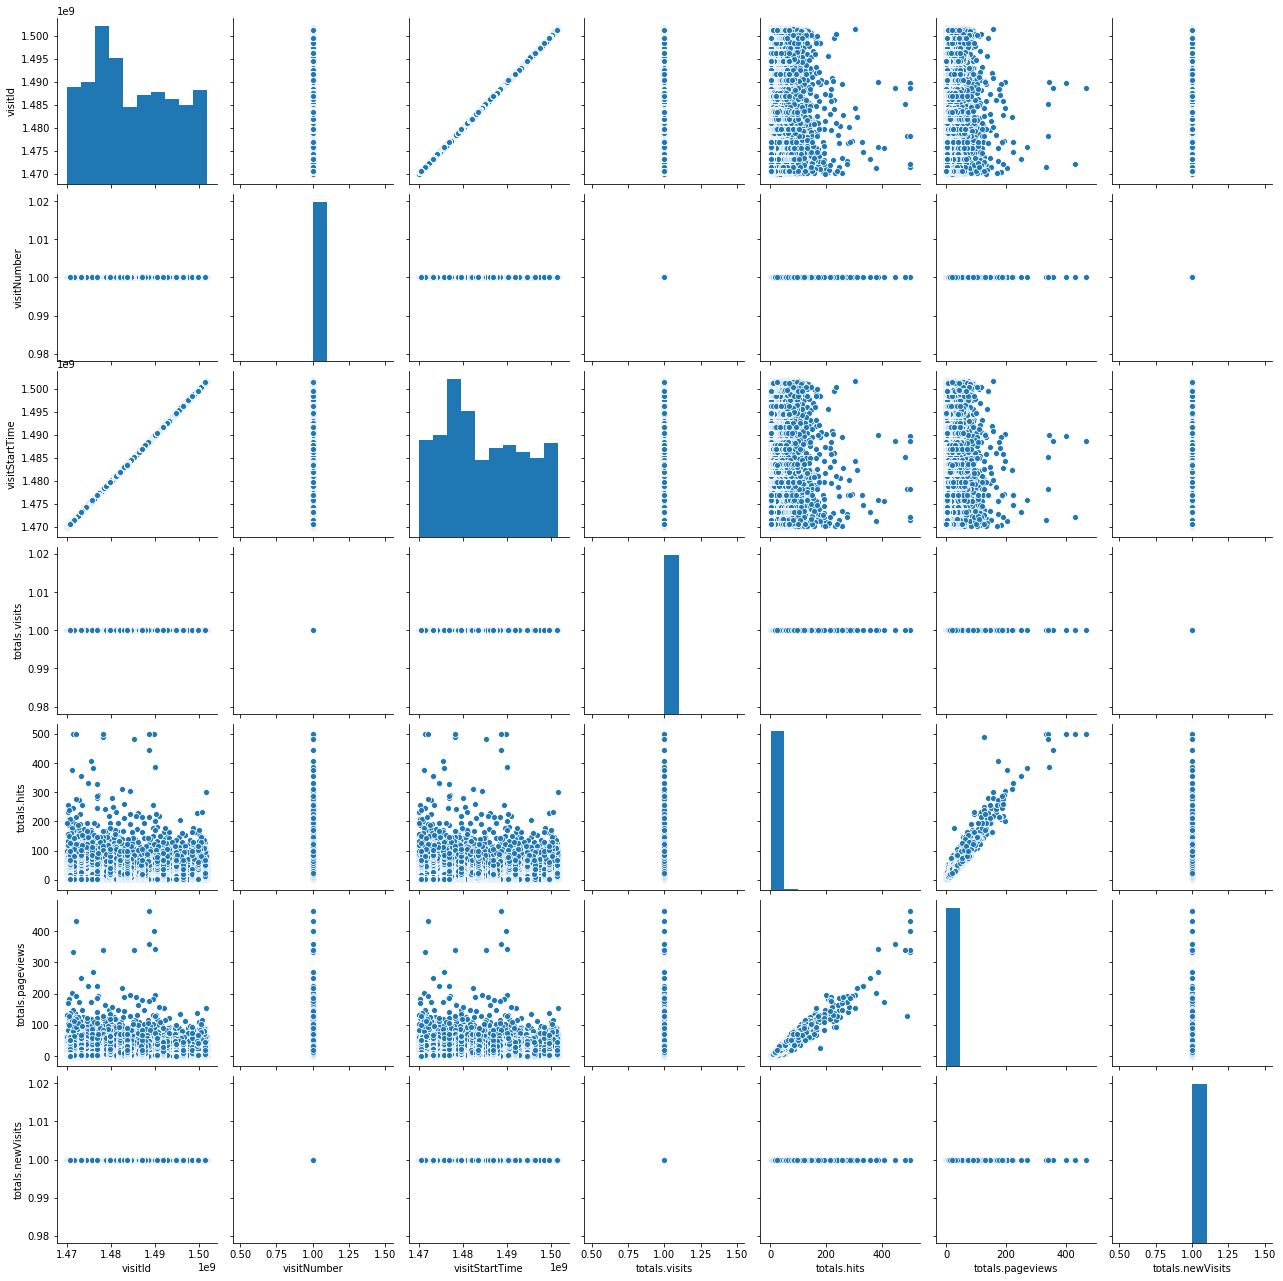

In [0]:
sns.pairplot(data=data[['date','visitId','visitNumber','visitStartTime','totals.visits','totals.hits','totals.pageviews','totals.newVisits']].dropna())
plt.show()

#let's analyse data by its type

1.GeoNetwork
Three features 'geoNetwork.continent', 'geoNetwork.subContinent', 'geoNetwork.country' are related to GeoNetwork

In [0]:
data['geoNetwork.continent'].value_counts()

Americas     450377
Asia         223698
Europe       198311
Oceania       15054
Africa        14745
(not set)      1468
Name: geoNetwork.continent, dtype: int64

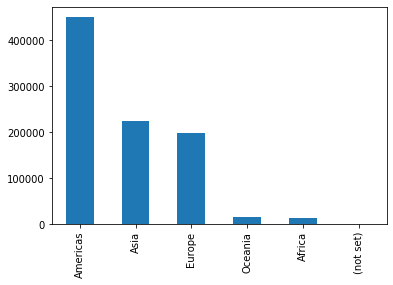

In [0]:
hist = data['geoNetwork.continent'].value_counts().plot.bar()

In [0]:
data.groupby(['geoNetwork.continent','geoNetwork.country']).plot.bar()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



In [0]:
data[data['geoNetwork.continent']=='Asia'].plot.bar()

In [0]:
print(data['geoNetwork.country'].value_counts().head(20))

United States     364744
India              51140
United Kingdom     37393
Canada             25869
Vietnam            24598
Turkey             20522
Thailand           20123
Germany            19980
Brazil             19783
Japan              19731
France             15832
Mexico             13225
Taiwan             12996
Australia          12698
Russia             11662
Spain              11658
Netherlands        11453
Italy              11332
Poland              9693
Indonesia           9273
Name: geoNetwork.country, dtype: int64


In [0]:
data_country=data.groupby(['geoNetwork.country']).agg({"totals.transactionRevenue": "sum"}).dropna().sort_values( "totals.transactionRevenue",ascending = False)

In [0]:
data_country.head(20)

,totals.transactionRevenue
geoNetwork.country,
United States,1.452441e+12
Canada,3.282454e+10
Venezuela,1.337490e+10
Japan,6.728990e+09
Kenya,5.268700e+09
Nigeria,3.302400e+09
Taiwan,1.920890e+09
Indonesia,1.840380e+09
Australia,1.745260e+09


#device  
<br>
columns:<br>
device.browser<br>              
device.operatingSystem<br>         
device.deviceCategory <br>

In [0]:
data['device.browser'].value_counts()

Chrome                                         620364
Safari                                         182245
Firefox                                         37069
Internet Explorer                               19375
Edge                                            10205
Android Webview                                  7865
Safari (in-app)                                  6850
Opera Mini                                       6139
Opera                                            5643
UC Browser                                       2427
YaBrowser                                        2096
Coc Coc                                           727
Amazon Silk                                       561
Android Browser                                   553
Mozilla Compatible Agent                          374
MRCHROME                                          263
Maxthon                                           246
BlackBerry                                        184
Nintendo Browser            

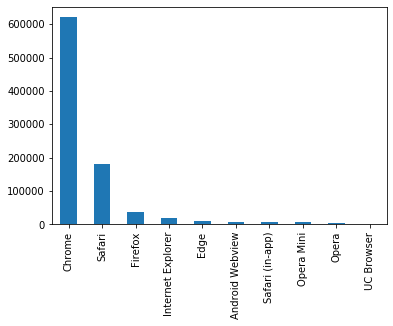

In [0]:
hist = data['device.browser'].value_counts()[:10].plot.bar()

In [0]:
#device.operatingSystem

In [0]:
data['device.operatingSystem'].value_counts()

Windows          350072
Macintosh        253938
Android          123892
iOS              107665
Linux             35034
Chrome OS         26337
(not set)          4695
Windows Phone      1216
Samsung             280
BlackBerry          218
Nintendo Wii        100
Firefox OS           89
Xbox                 66
Nintendo WiiU        35
FreeBSD               9
OpenBSD               2
Nokia                 2
Nintendo 3DS          1
SunOS                 1
NTT DoCoMo            1
Name: device.operatingSystem, dtype: int64

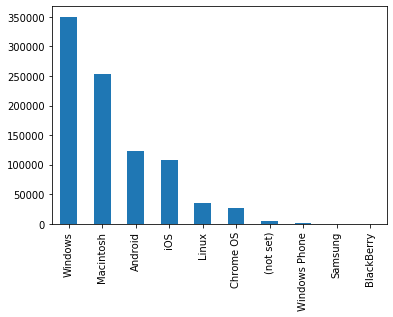

In [0]:
data['device.operatingSystem'].value_counts()[:10].plot.bar()

In [0]:
data_os_revenue=data.groupby(['device.operatingSystem']).agg({"totals.transactionRevenue": "sum"}).dropna().sort_values( "totals.transactionRevenue",ascending = False)

In [0]:
data_os_revenue.head(10)

,totals.transactionRevenue
device.operatingSystem,
Macintosh,8.563758e+11
Windows,3.973127e+11
Chrome OS,1.839378e+11
Linux,4.391040e+10
Android,3.634128e+10
iOS,2.216690e+10
Windows Phone,2.640000e+07
Nokia,0.000000e+00
Xbox,0.000000e+00


In [0]:
#device.deviceCategory

In [0]:
data['device.deviceCategory'].value_counts()

desktop    664479
mobile     208725
tablet      30449
Name: device.deviceCategory, dtype: int64

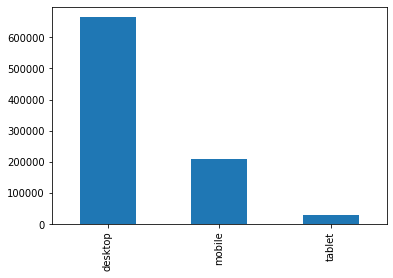

In [0]:
data['device.deviceCategory'].value_counts()[:10].plot.bar()

In [0]:
data_device_revenue=data.groupby(['device.deviceCategory']).agg({"totals.transactionRevenue": "sum"}).dropna().sort_values( "totals.transactionRevenue",ascending = False)

In [0]:
data_device_revenue

,totals.transactionRevenue
device.deviceCategory,
desktop,1.480864e+12
mobile,4.978581e+10
tablet,9.421340e+09


#trafficSource

In [0]:
data['trafficSource.source'].value_counts().head(20)

google                     400788
youtube.com                212602
(direct)                   143028
mall.googleplex.com         66416
Partners                    16411
analytics.google.com        16172
dfa                          5686
google.com                   4669
m.facebook.com               3365
baidu                        3356
sites.google.com             2983
facebook.com                 2296
siliconvalley.about.com      2097
reddit.com                   2022
qiita.com                    1813
quora.com                    1546
bing                         1530
t.co                         1529
yahoo                        1480
mail.google.com              1457
Name: trafficSource.source, dtype: int64

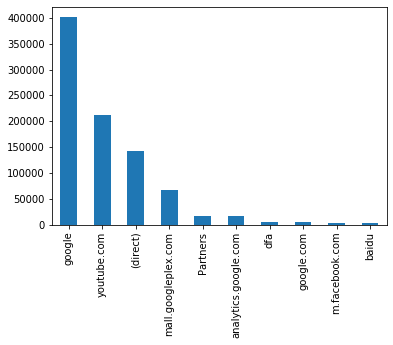

In [0]:
data['trafficSource.source'].value_counts()[:10].plot.bar()

In [0]:
data_trafficSource_revenue=data.groupby(['trafficSource.source']).agg({"totals.transactionRevenue": "sum"}).dropna().sort_values( "totals.transactionRevenue",ascending = False)

In [0]:
data_trafficSource_revenue.head(10)

,totals.transactionRevenue
trafficSource.source,
mall.googleplex.com,6.129680e+11
(direct),4.348406e+11
google,3.689654e+11
dfa,7.692842e+10
mail.google.com,2.332791e+10
dealspotr.com,5.690640e+09
sites.google.com,4.390780e+09
gdeals.googleplex.com,2.175540e+09
groups.google.com,1.631260e+09


In [0]:
data['trafficSource.medium'].value_counts().head(20)

organic      381561
referral     330955
(none)       143026
cpc           25326
affiliate     16403
cpm            6262
(not set)       120
Name: trafficSource.medium, dtype: int64

In [0]:
data_medium_revenue=data.groupby(['trafficSource.medium']).agg({"totals.transactionRevenue": "sum"}).dropna().sort_values( "totals.transactionRevenue",ascending = False)

In [0]:
data_medium_revenue

,totals.transactionRevenue
trafficSource.medium,
referral,6.563464e+11
(none),4.348406e+11
organic,3.263805e+11
cpm,7.833746e+10
cpc,4.355890e+10
affiliate,5.973800e+08
(not set),9.990000e+06


In [0]:
#numerical features
visitNumber
totals.visits
totals.hits
totals.pageviews
totals.newVisits
totals.transactionRevenue

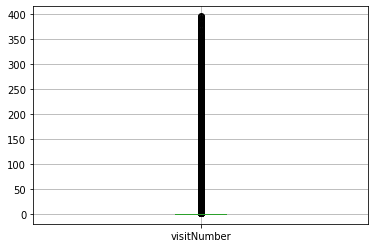

In [0]:
data.boxplot(column='visitNumber')
plt.show()

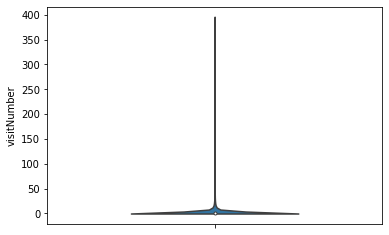

In [0]:
sns.violinplot(x=data['visitNumber'], orient='v', width=0.5)
plt.show()

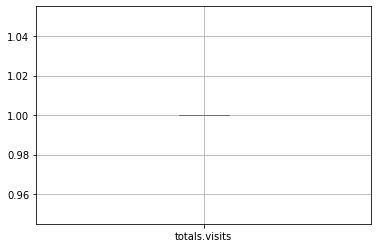

In [0]:
data.boxplot(column='totals.visits')
plt.show()

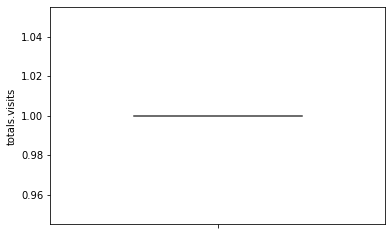

In [0]:
sns.violinplot(x=data['totals.visits'], orient='v', width=0.5)
plt.show()

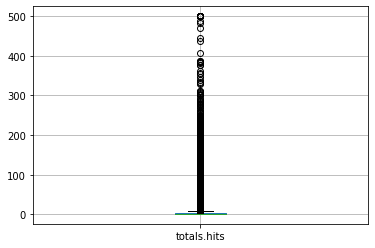

In [0]:
data.boxplot(column='totals.hits')
plt.show()

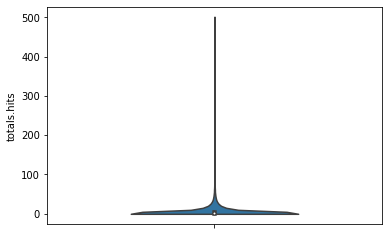

In [0]:
sns.violinplot(x=data['totals.hits'], orient='v', width=0.5)
plt.show()

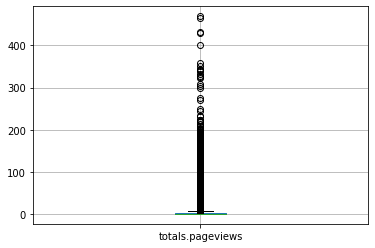

In [0]:
data.boxplot(column='totals.pageviews')
plt.show()

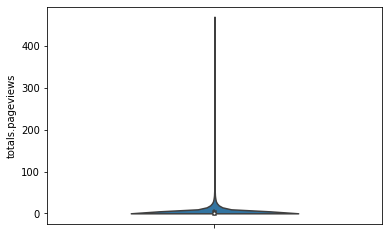

In [0]:
sns.violinplot(x=data['totals.pageviews'], orient='v', width=0.5)
plt.show()

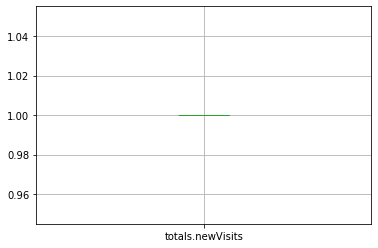

In [0]:
data.boxplot(column='totals.newVisits')
plt.show()

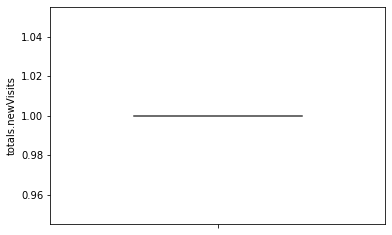

In [0]:
sns.violinplot(x=data['totals.newVisits'], orient='v', width=0.5)
plt.show()

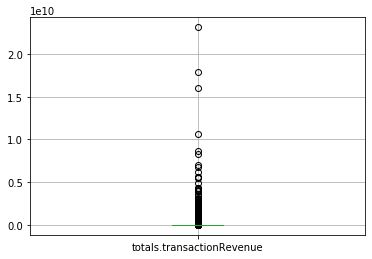

In [0]:
data.boxplot(column='totals.transactionRevenue')
plt.show()

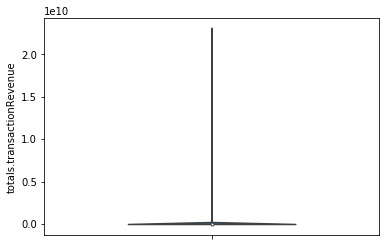

In [0]:
sns.violinplot(x=data['totals.transactionRevenue'], orient='v', width=0.5)
plt.show()

#Summary

In [0]:
Let's talk about result of EDA Analysis
#GeoNetwork
Geo network-In this field we have three columns as 'geoNetwork.continent', 'geoNetwork.subContinent', 'geoNetwork.country'
Visits from united states counts maximum number which is far ahead from users of other country, same trend is same in revenue USA is well ahead but unusual trend 
is noticed here is that visits from some countries may be higher but that does not converted into purchasing.So we can say in some countries people have a behaviour 
of window shopping.
#Device
Device-In this field we have three columns i.e 'device.browser' ,'device.operatingSystem','device.deviceCategory'
device.browser-More than 70% of the users use Chrome or Safari combined furthermore visitors from chrome are thrice than safari.
device.operatingSystem-Most of the users use windows OS followed by Macintosh,android but we can see very unusual trend that revenue contribution from users
using machintosh is highest.This is due to the fact that machintosh machines are expensive that can only be afford by rich people, so they have more purchasing power 
than others.
device.deviceCategory-In device category most of the users use desktop which is thrice to mobile.
#trafficSource
Most of the users sessions is originated from google.com but most revenue contribution is from mall.googleplex.com inspite of the fact that mall.googleplex.com users
are just 1/6th.This can be due to the fact that registered users have more chances of buying than non registered users.

When numerica analysis of features is done, we are getting very spiked curves which shows the variation between the users.As we had seen most of the users are just
visitors, they have 0 contribution in revenue so there are some users who do buy so we are getting spiked curve due to them.


